<a href="https://colab.research.google.com/github/MominaSiddiq/AI_Generated_vs_HumanCreated_Sketches/blob/main/AI_vs_Human_sketches_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Imports

from google.colab import drive
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.preprocessing.image import array_to_img
import collections
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import shutil



# Fetch data
Fetching data from the drive in three folders (Splited Data): Test, Valid and Train  

In [2]:
# Fetch dataset from the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Fetch the split data from the drive

train_dir = '/content/drive/MyDrive/sketch_classification_project/train'
valid_dir = '/content/drive/MyDrive/sketch_classification_project/valid'
test_dir = '/content/drive/MyDrive/sketch_classification_project/test'

In [7]:
# Verify paths
for dir_path in [train_dir, valid_dir, test_dir]:
    if os.path.exists(dir_path):
        print(f"Directory exists: {dir_path}")
    else:
        print(f"Directory does not exist: {dir_path}")


Directory exists: /content/drive/MyDrive/sketch_classification_project/train
Directory exists: /content/drive/MyDrive/sketch_classification_project/valid
Directory exists: /content/drive/MyDrive/sketch_classification_project/test


In [14]:
# Check .png files in source directories
for category in ['AI', 'Human']:
    for dir_path in [train_dir, valid_dir, test_dir]:
        full_path = os.path.join(dir_path, category)
        if os.path.exists(full_path):
            all_images = [img for img in os.listdir(full_path) if img.endswith(( '.jpg'))]
            print(f"{len(all_images)} images found in {full_path}")

5894 images found in /content/drive/MyDrive/sketch_classification_project/train/AI
560 images found in /content/drive/MyDrive/sketch_classification_project/valid/AI
280 images found in /content/drive/MyDrive/sketch_classification_project/test/AI
5880 images found in /content/drive/MyDrive/sketch_classification_project/train/Human
560 images found in /content/drive/MyDrive/sketch_classification_project/valid/Human
280 images found in /content/drive/MyDrive/sketch_classification_project/test/Human


In [15]:
# Clear subset directories
def clear_directory(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)  # Delete the directory and its contents
    os.makedirs(directory, exist_ok=True)  # Recreate the directory

# Clear subset directories
clear_directory(subset_train_dir + '/AI')
clear_directory(subset_train_dir + '/Human')
clear_directory(subset_valid_dir + '/AI')
clear_directory(subset_valid_dir + '/Human')
clear_directory(subset_test_dir + '/AI')
clear_directory(subset_test_dir + '/Human')

In [19]:
# Function to copy a subset of images
def copy_subset(src_dir, dest_dir, num_images):
    for category in ['AI', 'Human']:
        src_category_dir = os.path.join(src_dir, category)
        dest_category_dir = os.path.join(dest_dir, category)

        # Filter only .png files
        all_images = [img for img in os.listdir(src_category_dir) if img.endswith('.jpg')]
        print(f"Found {len(all_images)} .jpg images in {src_category_dir}")

        # Ensure there are enough images to sample
        if len(all_images) < num_images:
            print(f"Not enough images in {src_category_dir}. Needed: {num_images}, Found: {len(all_images)}")
            num_images = len(all_images)  # Adjust to the available images

        # Randomly select images and copy
        selected_images = random.sample(all_images, num_images)
        for img in selected_images:
            print(f"Copying {img} to {dest_category_dir}")
            shutil.copy2(os.path.join(src_category_dir, img), os.path.join(dest_category_dir, img))


In [20]:
# Paths for new subset directories
subset_dir = '/content/drive/MyDrive/sketch_classification_project_subset'
subset_train_dir = os.path.join(subset_dir, 'train')
subset_valid_dir = os.path.join(subset_dir, 'valid')
subset_test_dir = os.path.join(subset_dir, 'test')

# Create new directories for subset
os.makedirs(subset_train_dir + '/AI', exist_ok=True)
os.makedirs(subset_train_dir + '/Human', exist_ok=True)
os.makedirs(subset_valid_dir + '/AI', exist_ok=True)
os.makedirs(subset_valid_dir + '/Human', exist_ok=True)
os.makedirs(subset_test_dir + '/AI', exist_ok=True)
os.makedirs(subset_test_dir + '/Human', exist_ok=True)

In [21]:
# Copy subset of images
total_image_to_process = 1000
train_images = 400
copy_subset(train_dir, subset_train_dir, 400)  # 400 per class for training
copy_subset(valid_dir, subset_valid_dir, 50)   # 50 per class for validation
copy_subset(test_dir, subset_test_dir, 50)    # 50 per class for testing

Found 5894 .jpg images in /content/drive/MyDrive/sketch_classification_project/train/AI
Copying image0455_png.rf.686b8ee818a73eeb50fdd25851856e4f.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0070_png.rf.753b830eda27b3df06a89510cea965a0.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0623_png.rf.e273e20e9611bd0f6a9f763e7455c7a1.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0387_png.rf.0d8c15bdf0df0d26148818c202260f40.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0044_png.rf.50daa0ccd80729cf93b66d5649f3c651.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0699_png.rf.f1380d7fac26e9b7fd842d5a7cc3bd8e.jpg to /content/drive/MyDrive/sketch_classification_project_subset/train/AI
Copying image0229_png.rf.01e499efa4ab61c1ed8fb0c77f2dc15e.jpg to /content/drive/MyDrive/sketch_classificatio

In [22]:
# Check subset directory contents
for category in ['AI', 'Human']:
    for subset_dir in [subset_train_dir, subset_valid_dir, subset_test_dir]:
        subset_category_dir = os.path.join(subset_dir, category)
        print(f"{len(os.listdir(subset_category_dir))} images in {subset_category_dir}")

400 images in /content/drive/MyDrive/sketch_classification_project_subset/train/AI
50 images in /content/drive/MyDrive/sketch_classification_project_subset/valid/AI
50 images in /content/drive/MyDrive/sketch_classification_project_subset/test/AI
400 images in /content/drive/MyDrive/sketch_classification_project_subset/train/Human
50 images in /content/drive/MyDrive/sketch_classification_project_subset/valid/Human
50 images in /content/drive/MyDrive/sketch_classification_project_subset/test/Human


In [23]:
# Update directories
subset_train_dir = '/content/drive/MyDrive/sketch_classification_project_subset/train'
subset_valid_dir = '/content/drive/MyDrive/sketch_classification_project_subset/valid'
subset_test_dir = '/content/drive/MyDrive/sketch_classification_project_subset/test'


# Data Augmentation

Doing the augmentation of the training data by rotating, rescaling, fliping, and shifting width and height.



In [ ]:
# Data augmentation for training data
train_datagen = image_dataset_from_directory(
    rescale=1./255,         # Normalize pixel values
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Randomly shear images
    zoom_range=0.2,         # Randomly zoom into images
    horizontal_flip=True    # Randomly flip images horizontally
)

# No augmentation for validation and test data
valid_datagen = image_dataset_from_directory(rescale=1./255)
test_datagen = image_dataset_from_directory(rescale=1./255)

# Load training data with augmentation
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary'      # Binary classification: AI vs Human
)

# Load validation data without augmentation
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Load test data without augmentation
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

TypeError: image_dataset_from_directory() got an unexpected keyword argument 'rescale'

# Pre-processing
Pre-processing of this images data include:


*   Re-sizing of images for efficient training.

*   Setting the batch size to 32 optimizes memory usage and speeds up training.



In [24]:
# Load training data
train_data = image_dataset_from_directory(
    subset_train_dir,
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32,          # Process in batches of 32
    label_mode='binary'     # Binary classification: AI vs Human
)

# Load validation data
valid_data = image_dataset_from_directory(
    subset_valid_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='binary'
)

# Load test data
test_data = image_dataset_from_directory(
    subset_test_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='binary'
)

Found 800 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


# Defining & Compiling CNN Model
Define and compile a basic CNN model for binary classification

1. Tried it by adding a dropout layer of 0.25.

In [28]:
# Define the CNN model with data augmentation
model = Sequential([
    # Input layer to specify the shape
    tf.keras.layers.Input(shape=(128, 128, 3)),

    # Data augmentation layers
    RandomFlip("horizontal"),    # Flip images horizontally
    RandomRotation(0.2),         # Rotate images randomly by 20%
    RandomZoom(0.2),             # Zoom images randomly by 20%

    # CNN layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),  # Dropout to reduce overfitting

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final dense layer

    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

# Training CNN Model
Train the model on the training data and validate on the validation set.

In [36]:
# Train the model
history = model.fit(
    train_data,           # Training data
    epochs=50,            # Number of passes over the entire training dataset
    validation_data=valid_data  # Validation data for monitoring performance
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5228 - loss: 0.6943 - val_accuracy: 0.5100 - val_loss: 0.6930
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5029 - loss: 0.7042 - val_accuracy: 0.4900 - val_loss: 0.6936
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5363 - loss: 0.6915 - val_accuracy: 0.4900 - val_loss: 0.6934
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5236 - loss: 0.6880 - val_accuracy: 0.4900 - val_loss: 0.6928
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5075 - loss: 0.6950 - val_accuracy: 0.4900 - val_loss: 0.6915
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5195 - loss: 0.7068 - val_accuracy: 0.4900 - val_loss: 0.6924
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5162 - loss: 0.6954 - val_accuracy: 0.4900 - val_loss: 0.6920
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4935 - loss: 0.6971 - val_accuracy: 0.4900 - val_loss:

# Visualizing
To monitor the model's performance over time, plot the training and validation accuracy and loss.

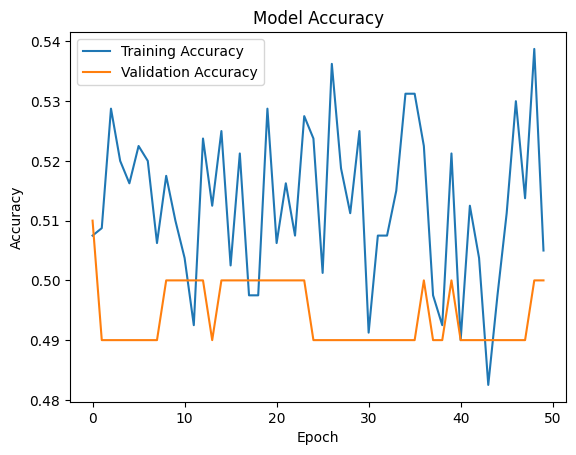

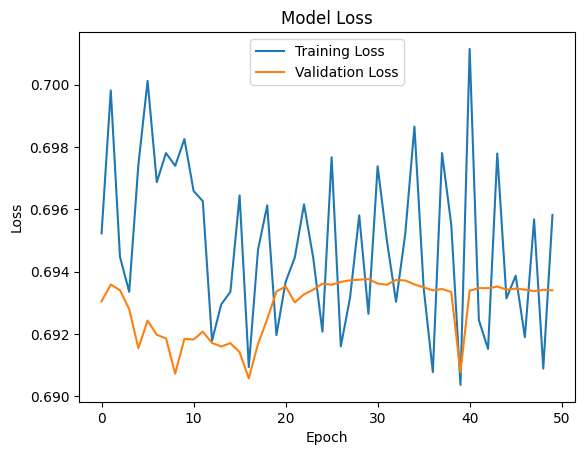

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


<ipython-input-38-0c434554e375>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(predicted_labels[i])]


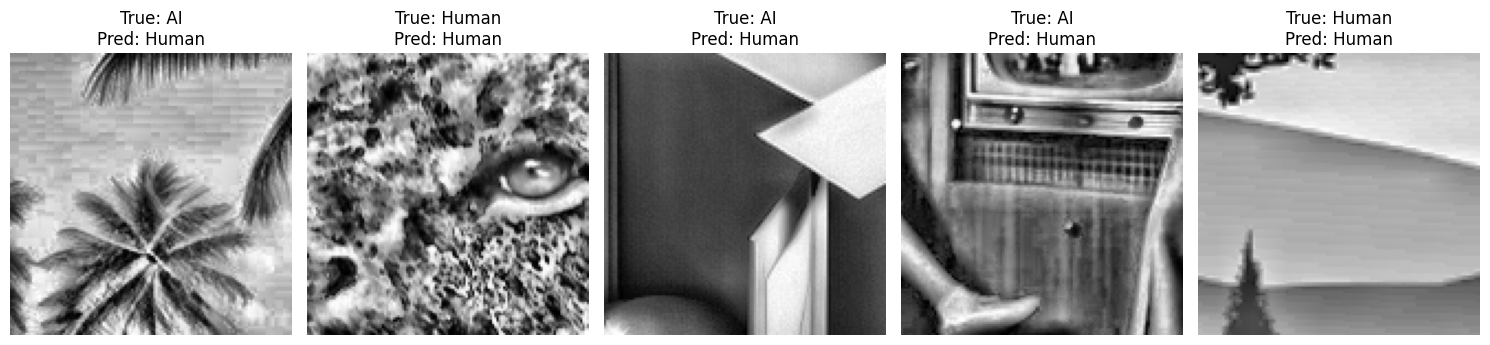

In [38]:
# Function to visualize predictions
def visualize_predictions(model, dataset, class_names, num_images=5):
    """
    Display a few images from the dataset along with their predicted labels.

    Args:
        model: Trained model for making predictions.
        dataset: Dataset (e.g., test_data) to pull images from.
        class_names: List of class names corresponding to labels (e.g., ['AI', 'Human']).
        num_images: Number of images to display.
    """
    # Get a batch of images and labels
    images, labels = next(iter(dataset))

    # Make predictions
    predictions = model.predict(images[:num_images])

    # Convert predictions to class labels
    predicted_labels = (predictions > 0.5).astype("int32")  # Threshold for binary classification

    # Display the images with predicted labels
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(array_to_img(images[i]))
        true_label = class_names[int(labels[i])]
        predicted_label = class_names[int(predicted_labels[i])]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Class names
class_names = ['AI', 'Human']  # Modify based on your dataset

# Call the function on test_data
visualize_predictions(model, test_data, class_names)